In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**1. Data Preparation & Preprocessing**

In [ ]:
# Importing the mask dataset
mask_files = os.listdir('/content/drive/MyDrive/Final Project AI/data/with_mask')
not_mask_files = os.listdir('/content/drive/MyDrive/Final Project AI/data/without_mask')

In [ ]:
# Analyzing the files
print(mask_files[:5])
print(not_mask_files[:5])

['with_mask_520.jpg', 'with_mask_887.jpg', 'with_mask_443.jpg', 'with_mask_830.jpg', 'with_mask_877.jpg']
['without_mask_358.jpg', 'without_mask_319.jpg', 'without_mask_311.jpg', 'without_mask_327.jpg', 'without_mask_340.jpg']


In [ ]:
# Making List variables as image labels
mask_labels = [1]*700
not_mask_labels = [0]*700
dataset_labels = mask_labels + not_mask_labels

In [ ]:
# Dataset to store the converted images
dataset = []

# Loops for image conversion and resizing
for img_file in mask_files:
  image = Image.open('/content/drive/MyDrive/Final Project AI/data/with_mask/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  dataset.append(image)

for img_file in not_mask_files:
  image = Image.open('/content/drive/MyDrive/Final Project AI/data/without_mask/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  dataset.append(image)

In [ ]:
# Analysing the dataset
print(len(dataset))
print(dataset[0].shape)

1400
(128, 128, 3)


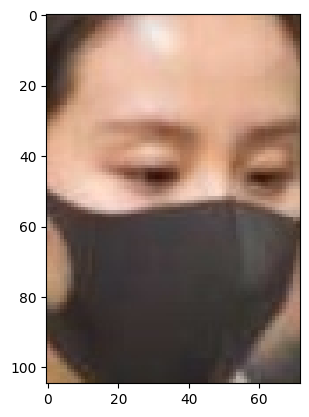

In [ ]:
# Displaying the images
img = mpimg.imread(r"/content/drive/MyDrive/Final Project AI/data/with_mask/with_mask_520.jpg")
imgplot = plt.imshow(img)
plt.show()

**2. Training the Model**

In [ ]:
# Converting the dataset into numpy arrays
X = np.array(dataset)
Y = np.array(dataset_labels)

In [ ]:
print(X.shape, Y.shape)

(1400, 128, 128, 3) (1400,)


In [ ]:
# Splitting the dataset (training & testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [ ]:
# Scaling the data
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_reshaped)

X_test_scaled = scaler.transform(X_test_reshaped)

X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

print(X_train_scaled.shape)
print(X_test_scaled.shape)


(1120, 128, 128, 3)
(280, 128, 128, 3)


In [ ]:
# Building the Convolutional Neural Network(CNN)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, Y_train, validation_split=0.3, epochs=5)

Epoch 1/5
25/25 [==============================] - 34s 1s/step - loss: 0.7100 - accuracy: 0.6173 - val_loss: 0.4046 - val_accuracy: 0.8661
Epoch 2/5
25/25 [==============================] - 28s 1s/step - loss: 0.3226 - accuracy: 0.8673 - val_loss: 0.2112 - val_accuracy: 0.9286
Epoch 3/5
25/25 [==============================] - 22s 881ms/step - loss: 0.2273 - accuracy: 0.9260 - val_loss: 0.1921 - val_accuracy: 0.9315
Epoch 4/5
25/25 [==============================] - 22s 890ms/step - loss: 0.2110 - accuracy: 0.9286 - val_loss: 0.2431 - val_accuracy: 0.9077
Epoch 5/5
25/25 [==============================] - 25s 1s/step - loss: 0.2038 - accuracy: 0.9298 - val_loss: 0.1821 - val_accuracy: 0.9226


**3. Evaluation and Optimisation**

In [ ]:
# Model Evaluation using Test Data
loss, accuracy = model.evaluate(X_test,Y_test)

9/9 [==============================] - 2s 228ms/step - loss: 48.7995 - accuracy: 0.9107


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


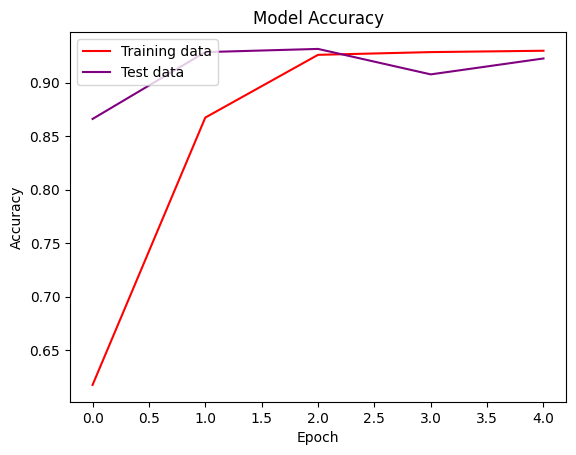

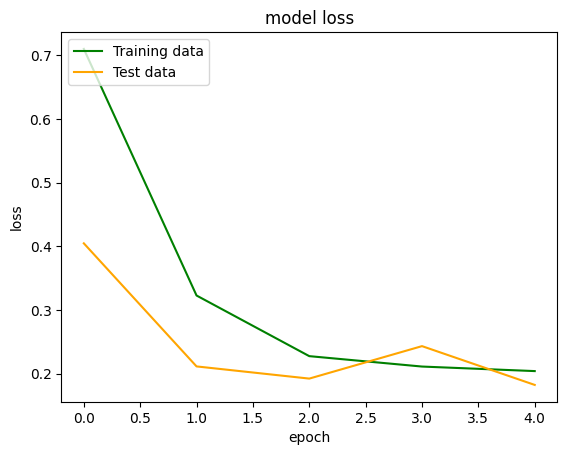

In [ ]:
# Model Accuracy & Loss Analysis

# Model Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'], color = "red")
plt.plot(history.history['val_accuracy'], color = "purple")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Test data'], loc='upper left')
plt.show()


# Model Loss
plt.plot(history.history['loss'], color = "green")
plt.plot(history.history['val_loss'], color = "orange")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Test data'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 124ms/step
[[0.40646395 0.66792   ]]
1
The person in the image is wearing a mask


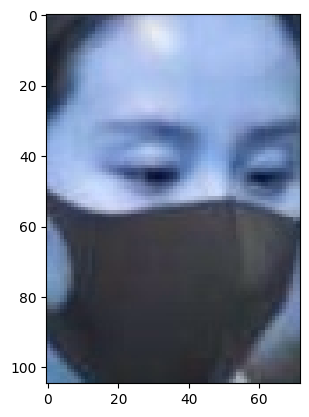

In [ ]:
input_image_path =r'/content/drive/MyDrive/Final Project AI/data/with_mask/with_mask_520.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

    print('The person in the image is wearing a mask')

else:

    print('The person in the image is not wearing a mask')

In [ ]:
# Save model
with open('model_architecture.json', 'w') as f:
  f.write(model.to_json())

model.save('model.h5')
# Save weights
model.save_weights('model_weights.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
